In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale

In [2]:
iris = load_iris()

In [3]:
import random
import pandas as pd

In [4]:
features = ['sl','sw','pl','pw']
target = ['class_0', 'class_1', 'class_2']
df = pd.DataFrame(iris.data, columns=features)
df['class'] = iris.target
df = df.join(pd.get_dummies(df['class'], prefix='class'))
df = df.drop('class', axis=1)
df.head()

,sl,sw,pl,pw,class_0,class_1,class_2
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [5]:
df_shuffled = df.sample(frac=1)

df_len = len(df_shuffled)

amount_train = df_len*0.8
amount_test = df_len - amount_train

X_train = df_shuffled.loc[:amount_train, features]
y_train = df_shuffled.loc[:amount_train, target]
X_test = df_shuffled.loc[amount_train:, features]
y_test = df_shuffled.loc[amount_train:, target]

print(y_train)


     class_0  class_1  class_2
90         0        1        0
113        0        0        1
85         0        1        0
94         0        1        0
71         0        1        0
..       ...      ...      ...
9          1        0        0
43         1        0        0
39         1        0        0
118        0        0        1
120        0        0        1

[66 rows x 3 columns]


2021-12-02 13:03:22.435089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-02 13:03:22.435138: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-02 13:03:43.478756: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-02 13:03:43.478829: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-02 13:03:43.478888: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (magody-pc): /proc/driver/nvidia/version does not exist
2021-12-02 13:03:43.479562: I tensorflow/core/platform/cpu_feature_

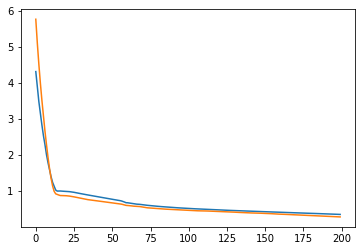

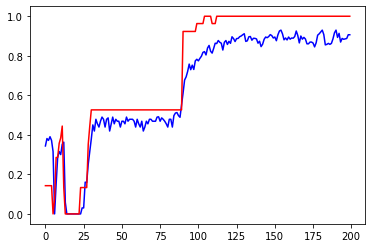

3/3 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.9765 - f1_score: 0.9792
[0.3146657347679138, 0.9764705896377563, 0.9791666865348816]


In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

adam = Adam(learning_rate=0.01)
model.compile(
    optimizer=adam, 
    loss='categorical_crossentropy', 
    metrics=['accuracy', f1_score])

h = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=0)
history = h.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.show()

plt.plot(history['f1_score'],'b')
plt.plot(history['val_f1_score'],'r')
plt.show()

print(model.evaluate(X_test, y_test))



In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9411764705882353


In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9647058823529412


In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
print(clf.score(X_test, y_test))


0.9294117647058824
